In [193]:
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [276]:
printer = pd.read_csv('printer.csv')
printer['time'] = pd.to_datetime(printer['time'])
printer = printer.set_index('time').sort_index().dropna()
printer['cumsum'] = printer['amount'].cumsum()

### A Ton Of USDT Has Been Printed On Omni

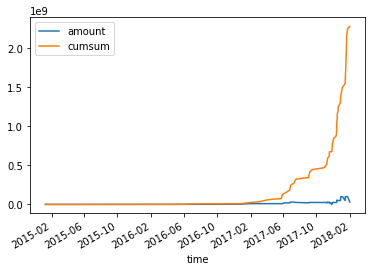

In [277]:
printer.plot()

### Especially In 2017

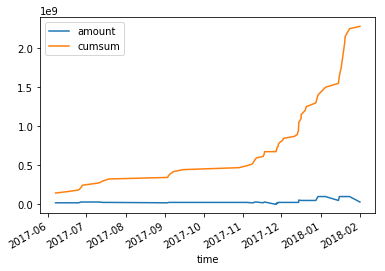

In [280]:
printer = printer[ printer.index > pd.to_datetime('2017-06-01') ]
printer.dropna().plot()

### Lets join USDT Printin with GDAX OHLCV Data

In [287]:
joined = pd.read_csv('joined_data.csv')

In [288]:
joined['ts'] = pd.to_datetime(joined['ts'])
joined = joined.set_index('ts').sort_index()

In [289]:
alldata = pd.read_csv('alldata.csv')

In [290]:
alldata['time'] = pd.to_datetime(alldata['time'])
alldata = alldata.set_index('time').sort_index()

In [291]:
groups = alldata.groupby('joints')
groupsdict = dict(list(groups))
keys = list(groups.indices.keys())

/Users/kennethgoodman/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


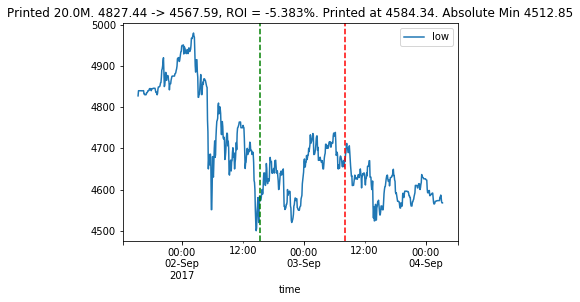

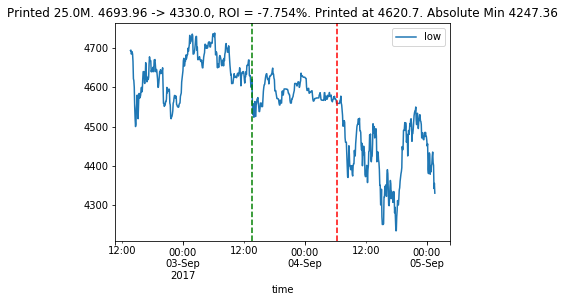

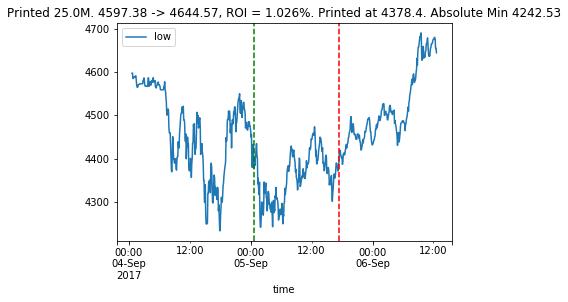

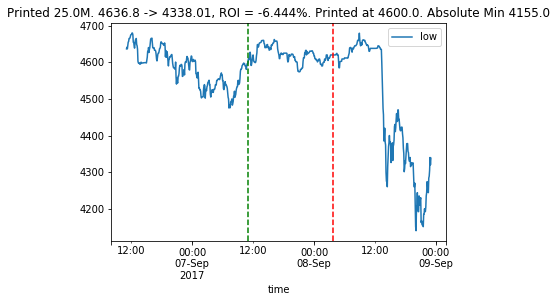

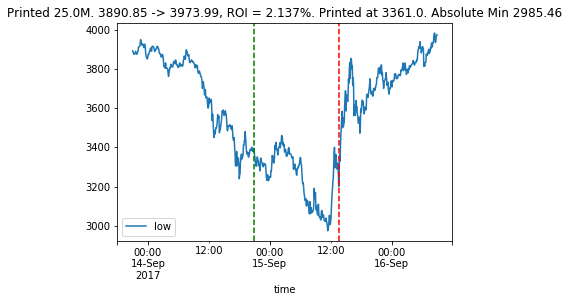

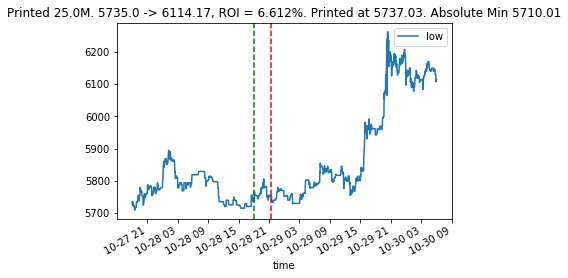

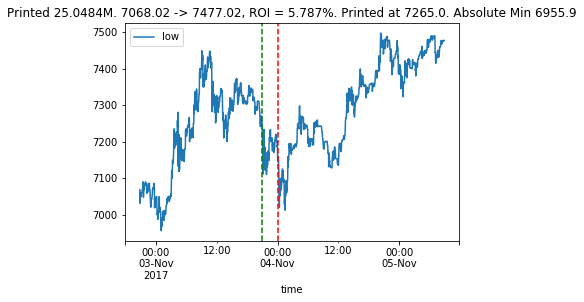

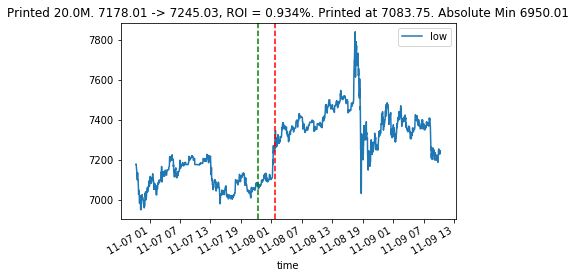

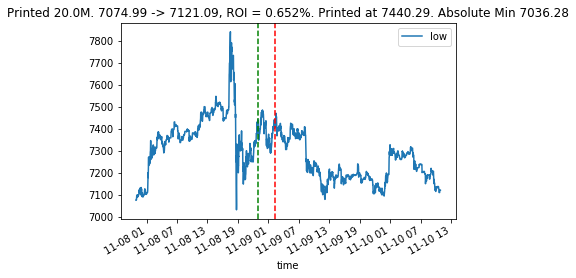

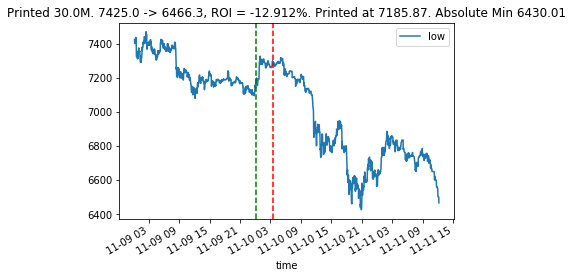

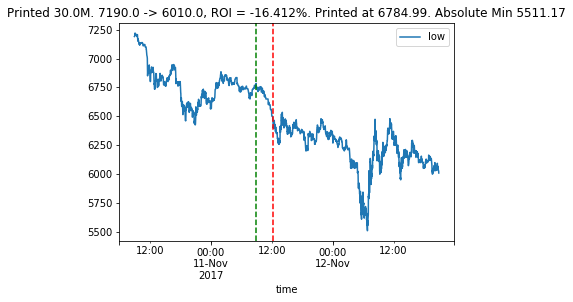

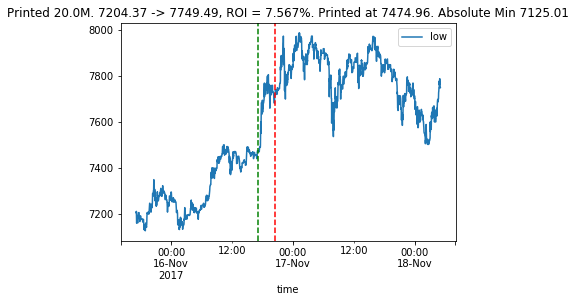

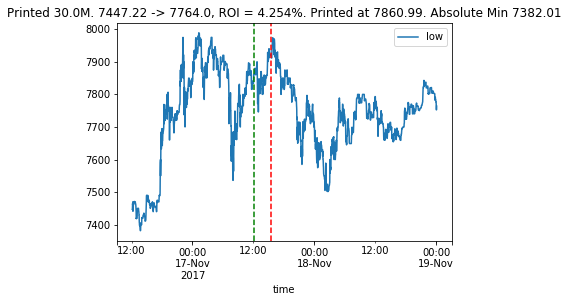

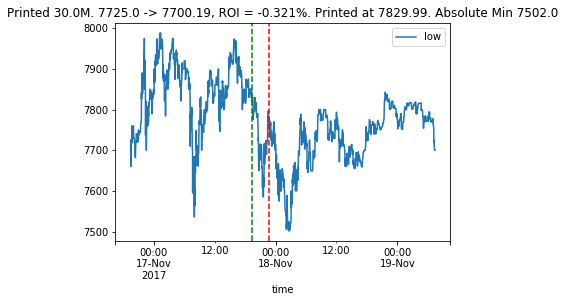

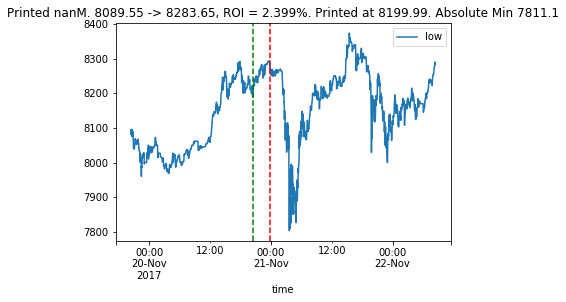

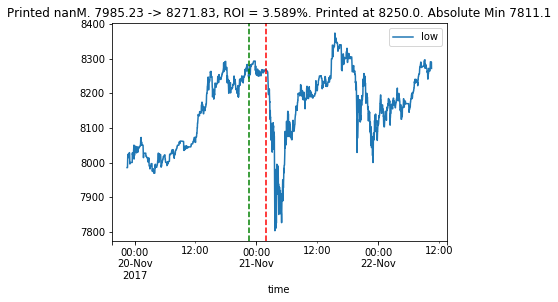

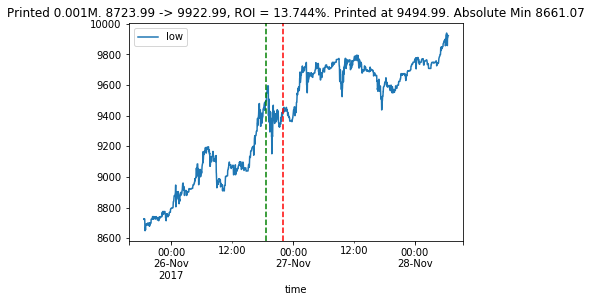

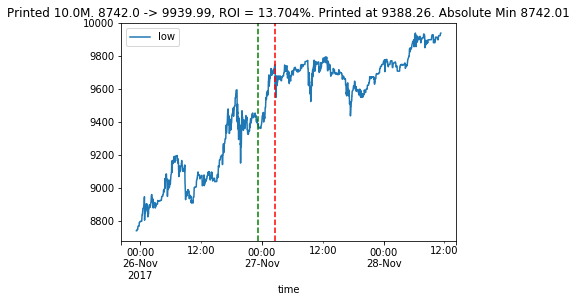

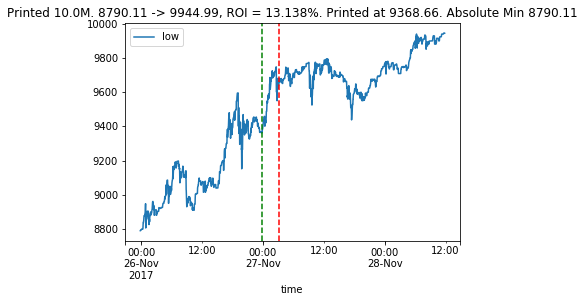

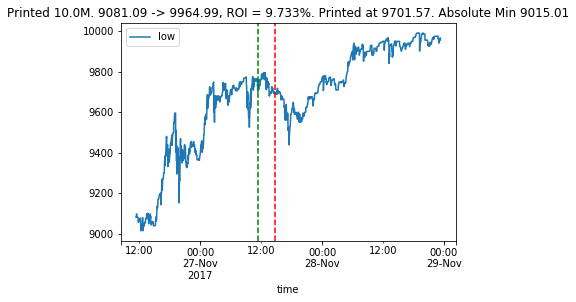

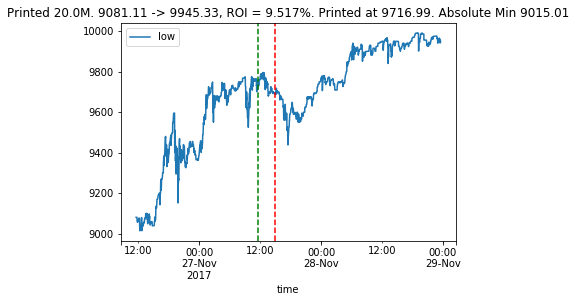

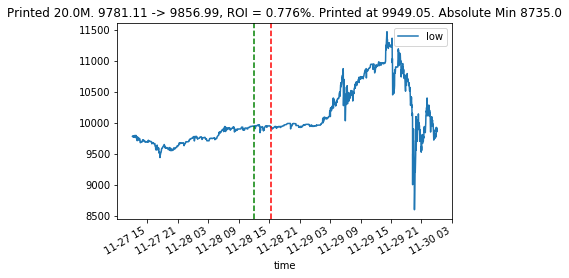

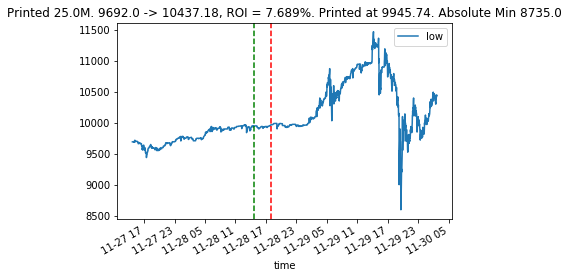

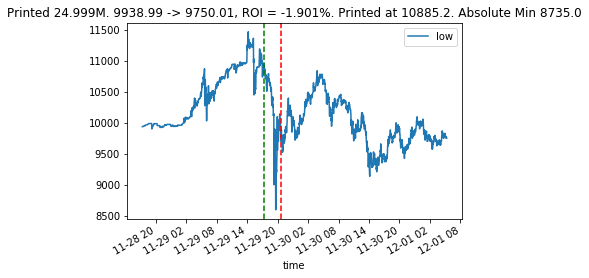

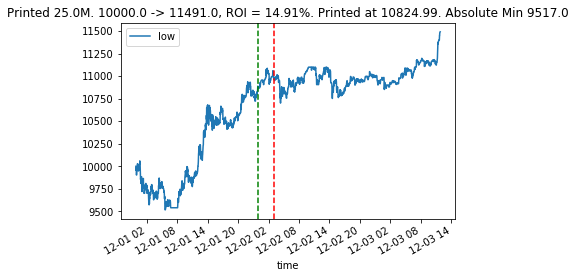

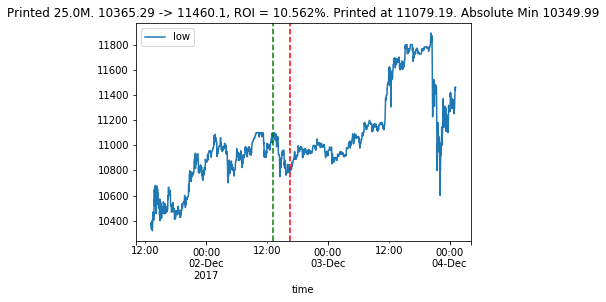

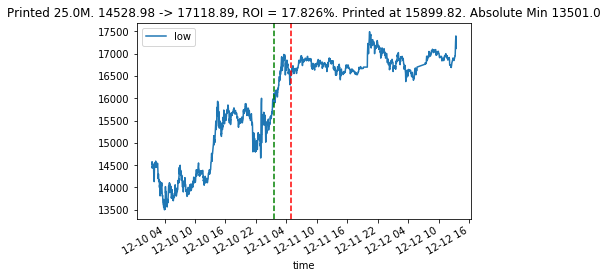

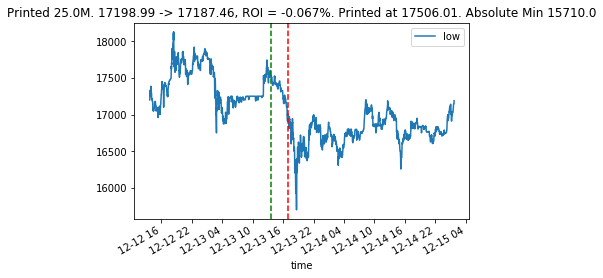

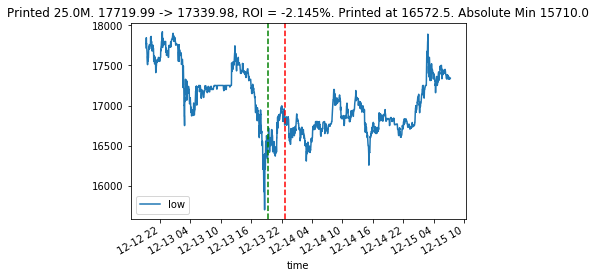

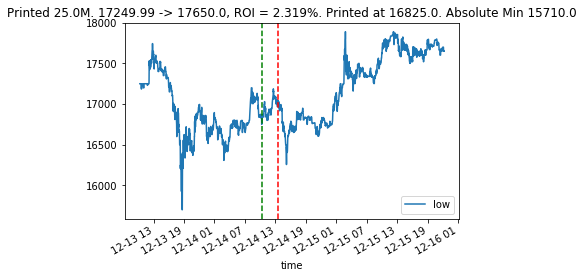

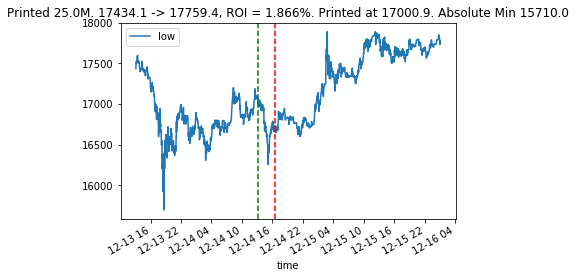

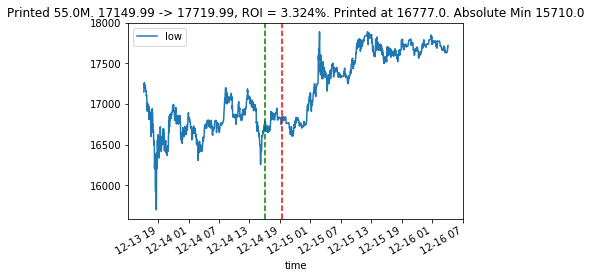

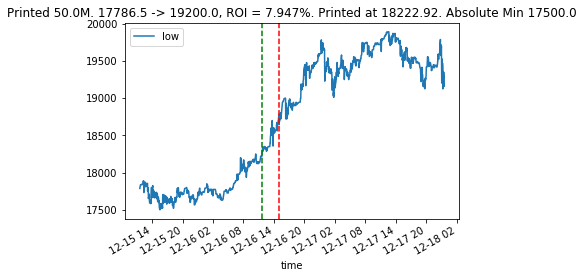

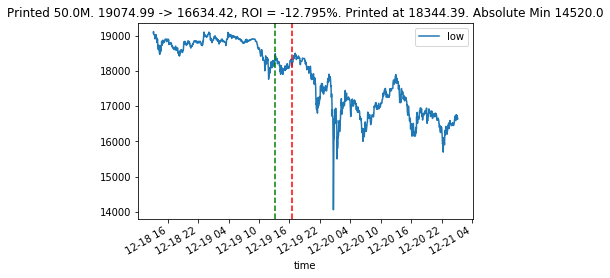

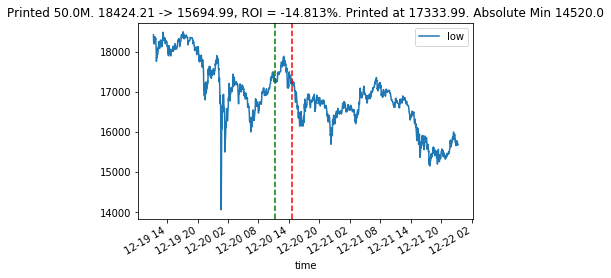

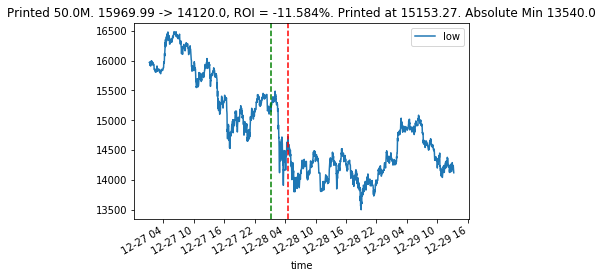

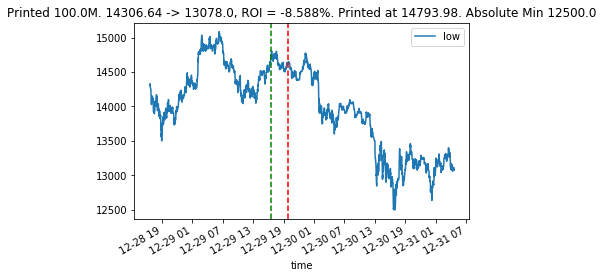

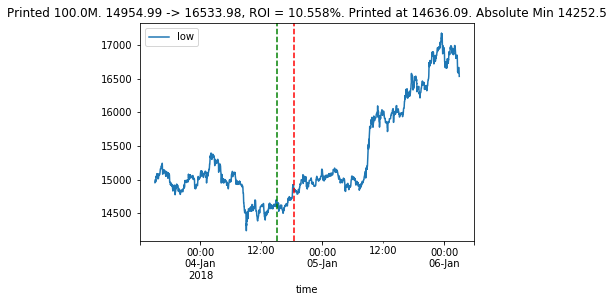

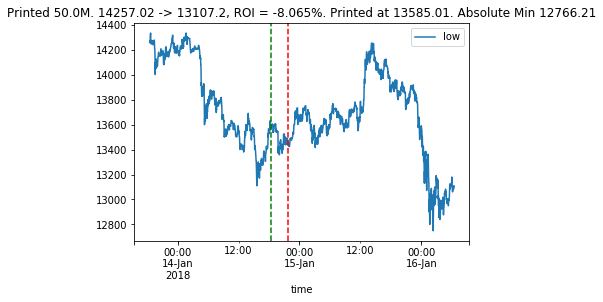

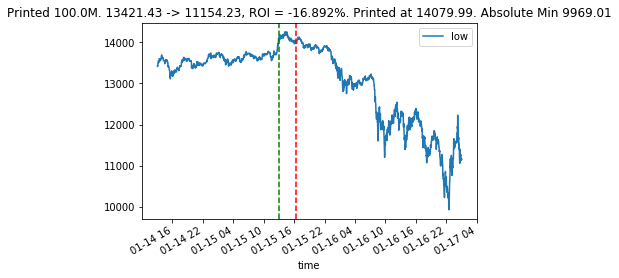

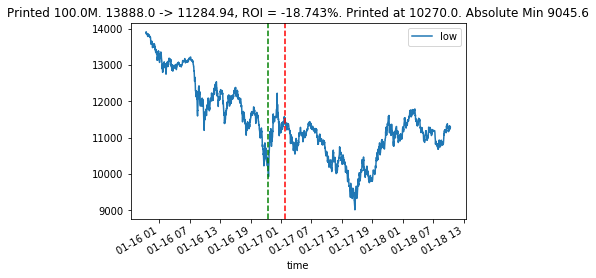

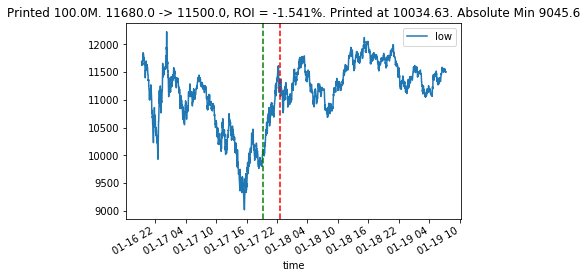

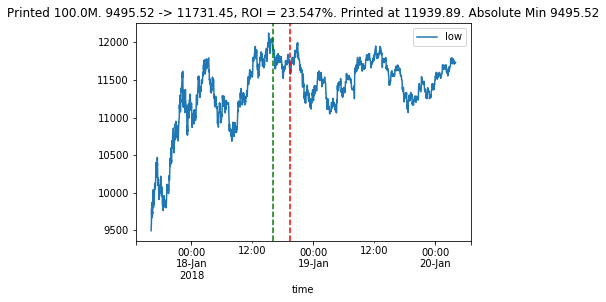

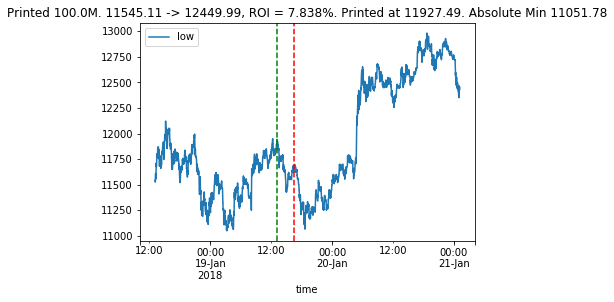

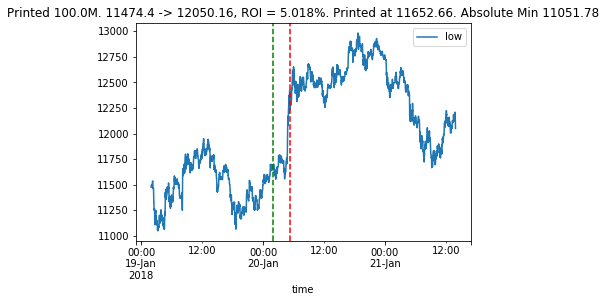

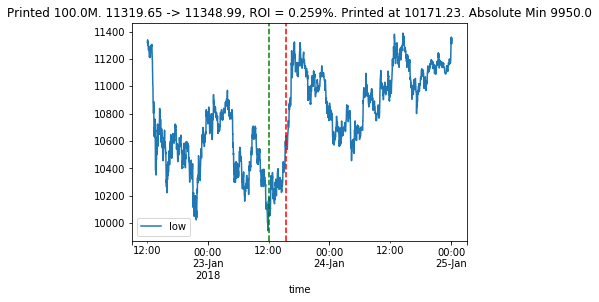

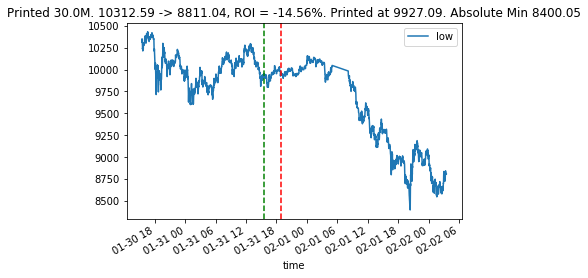

In [294]:
data = []
for key in keys:
    plotting_df = groups.get_group(key)
    plotting_df = plotting_df.dropna()
    amount = joined[ joined['joints'] == plotting_df['joints'].values[0]]['amount'].values[0]
    openamount = plotting_df.iloc[0]['low']
    endamount = plotting_df.iloc[-1]['low']
    roi = ((endamount-openamount)/openamount)*100
    plotting_df = plotting_df.loc[~plotting_df.index.duplicated(keep='first')]
    printed_index = plotting_df.index.get_loc(pd.to_datetime(key),method='nearest')
    printed_price = plotting_df.iloc[printed_index]['low']
    absolute_min = plotting_df['open'].min()
    
    price_200 = plotting_df.iloc[printed_index + 200]['low']
    roi200 = 100*(price_200 - printed_price)/printed_price
    plotting_df[['low']].plot(title='Printed {}M. {} -> {}, ROI = {}%. Printed at {}. Absolute Min {}'.format(
                                                                                amount/1000000.0,openamount,
                                                                               endamount,round(roi,3),
                                                                            printed_price,absolute_min))
    
    plt.axvline(pd.to_datetime(key),color='g', linestyle='--')
    plt.axvline(plotting_df.index[printed_index + 200],color='r', linestyle='--')
    plt.savefig('{}.png'.format(key))
    data.append([amount,openamount,endamount,roi,printed_price,absolute_min,roi200])

In [293]:
columns = ['amount','open','close','roi','printed_price','min','roi200']
plotted_data = pd.DataFrame(data,columns=columns)
plotted_data['roi_after_print'] = 100 * (plotted_data['close'] - plotted_data['printed_price'] )/(plotted_data['printed_price'])
temp = plotted_data.dropna()[['roi200','roi_after_print']]
print("roi after print for 200 ticks:",np.average(temp['roi200'] + 100) - 100,"%")
print("roi after print              :",np.average(temp['roi_after_print']+100) - 100,"%")

roi after print for 200 ticks: 0.5159031996069956 %
roi after print              : 0.8164187672984298 %
